In [1]:
import NeuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [2]:
mndata = MNIST('./data')

X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = nn.OneHot(y_train)
y_test = nn.OneHot(y_test)

In [3]:
layers = nn.BuildModel([("tanh", 784, 64), ("relu", 64, 16), ("softmax", 16, 10)])

In [4]:
validation_costs, training_scores = nn.Train(layers, X_train, y_train)

Training started, may take few minutes.
Training completed in 505.1108000278473 seconds.


In [5]:
prediction = nn.Predict(X_test, layers)
test_accuracy = nn.CalculateAccuracy(prediction, y_test)

Prediction complete!


Training Accuracy = 99.05
Test Accuracy = 97.16


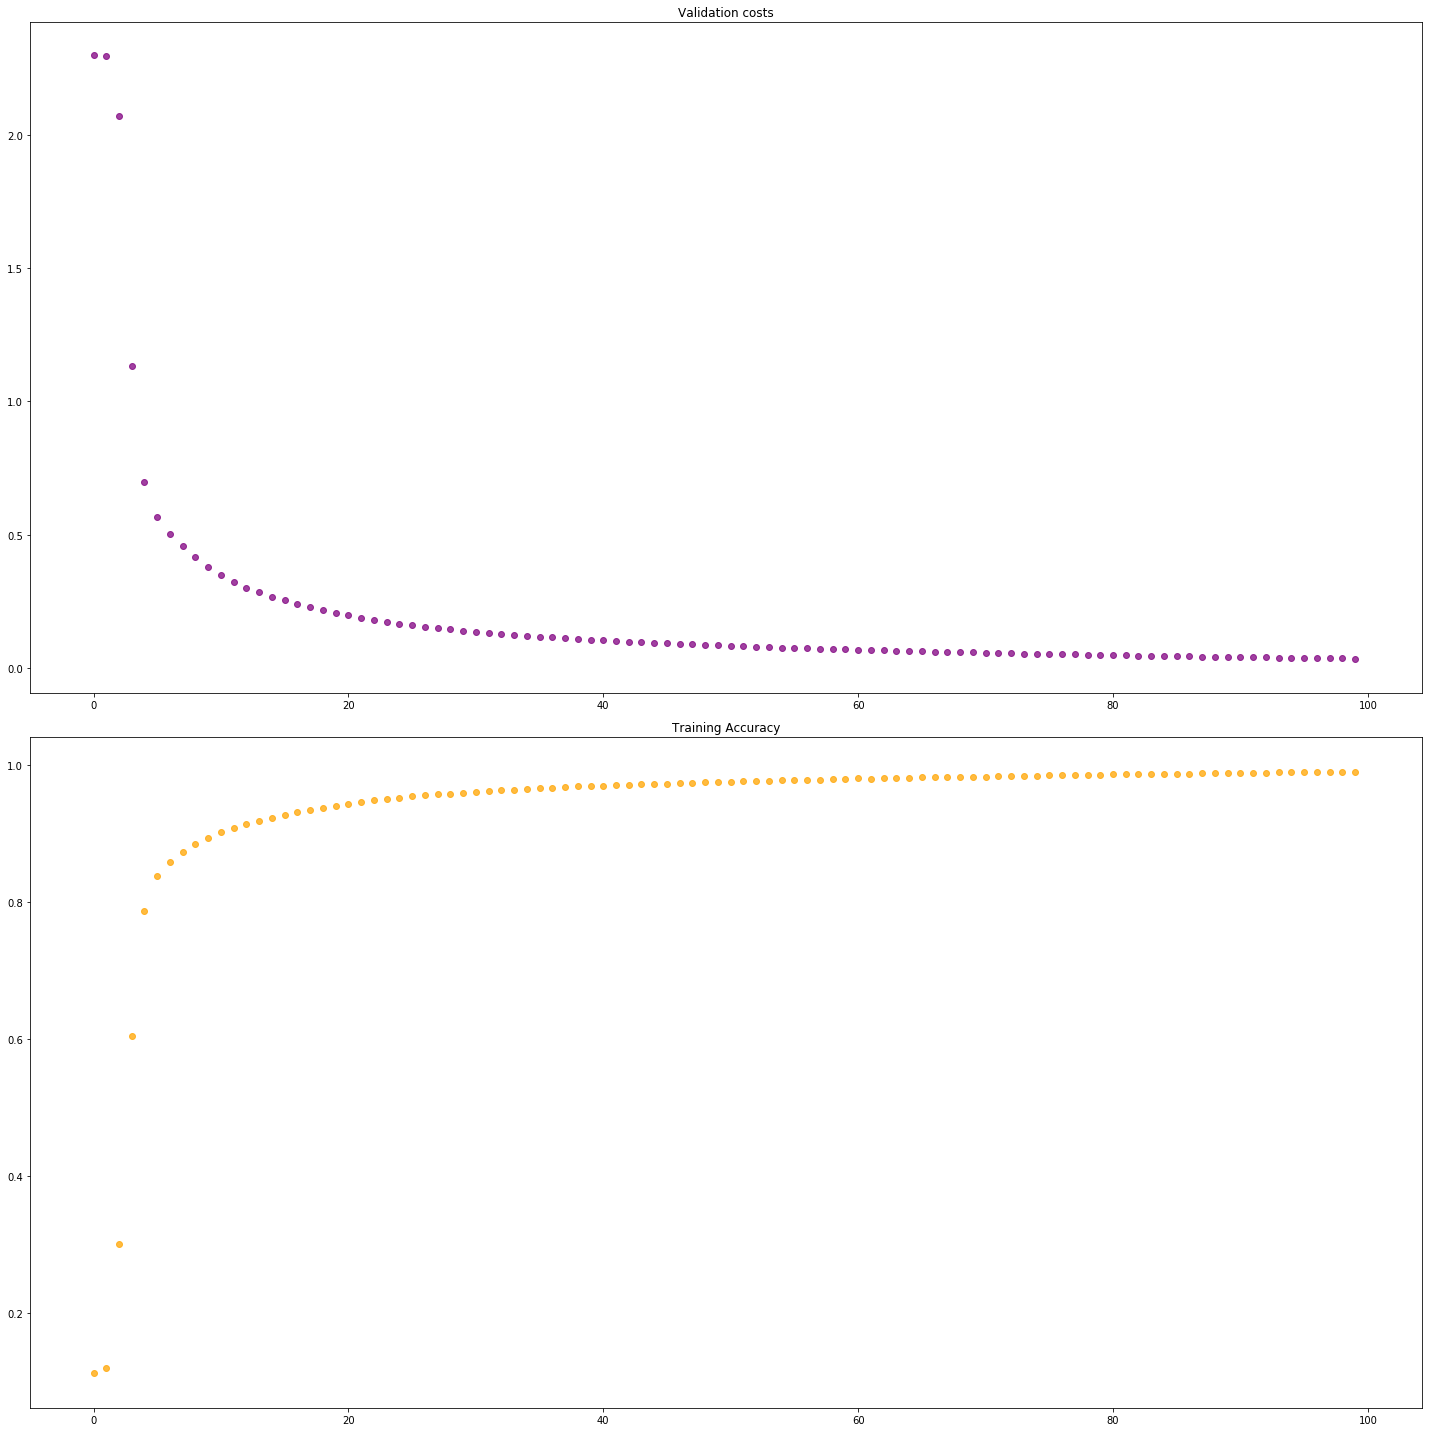

In [7]:
print("Training Accuracy = %s" % str(training_scores[-1] * 100))
print("Test Accuracy = %s" % str(test_accuracy * 100))
fig, axes = plt.subplots(2,1, figsize=(20,20))
axes[0].set_title("Validation costs")
axes[1].set_title("Training Accuracy")

for x, y in enumerate(validation_costs):
    axes[0].scatter(x, y, color='purple', alpha=0.75)
for x, y in enumerate(training_scores):
    axes[1].scatter(x, y, color='orange', alpha=0.75)

plt.tight_layout()
plt.show()